In [1]:
# Make IPython notebook wider see -> https://gist.github.com/paulochf/f6c9ed0b39f85dd85270

# from IPython.display import display, HTML

# display(HTML(data="""
# <style>
#     div#notebook-container    { width: 95%; }
#     div#menubar-container     { width: 65%; }
#     div#maintoolbar-container { width: 99%; }
# </style>
# """))

In [2]:
# %matplotlib inline
# %matplotlib qt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import scipy.signal
import os
# plt.rcParams["figure.figsize"] = (13,13)
np.set_printoptions(precision=4)
pd.options.display.max_rows = 4

data = None

# Read all file in folder
folder = 'SpectralReflectanceData'
for fileName in os.listdir(folder):
    if '.csv' in fileName:

        colName = fileName[16:-4]
        tmp = pd.read_csv(f'{folder}/{fileName}', sep=";", index_col=0, names=[colName])

        # Merge the file to one bigger array with correctly labeled coloms
        if data is None:
            data = tmp
        else:
            data[colName] = tmp[colName]

# print(data.head())
# print(data.info())
data

,plastic_green_tube_1,plastic_blue_belt_roll_2,plastic_marel_liner_on_fillet_3,plastic_yellow_latex_glove_3,chicken_thigh_4,plastic_blue_marel_liner_2,chicken_not_as_red_3,chicken_breast_fat_2,chicken_breast_fat_1,chicken_thigh_fat_4,...,chicken_thigh_fat_3,plastic_blue_pu_belt_2,chicken_thigh_membrane_2,plastic_black_latex_glove_1,plastic_blue_nitrile_glove_2,plastic_blue_shain_belt_3,plastic_yellow_latex_glove_2,chicken_thigh_2,plastic_blue_liner_plastic_2,plastic_blue_marel_liner_1
800.43,1.3881,0.55855,1.2020,0.17799,1.1662,0.29520,1.1243,0.80156,0.79254,0.67430,...,0.65050,0.59821,1.0407,1.9175,0.67960,0.90569,0.17638,1.2014,0.82905,0.28886
800.68,1.3898,0.55192,1.2153,0.17520,1.1736,0.29236,1.1217,0.81471,0.78497,0.66887,...,0.65111,0.59705,1.0390,1.9596,0.63952,0.91023,0.17171,1.1799,0.81139,0.28498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497.70,1.7566,1.75490,2.1019,1.27490,2.0028,1.26860,2.0528,1.83040,1.88090,1.77040,...,1.87570,1.91840,1.9497,1.9125,1.35510,1.89710,1.23360,2.0032,0.90163,1.23240
2500.10,1.7477,1.69340,2.0341,1.25530,1.9367,1.25510,2.0175,1.84770,1.99250,1.72910,...,1.86950,1.90640,1.9355,1.9343,1.40750,1.86960,1.23410,2.0135,0.89998,1.24080


<IPython.core.display.Javascript object>


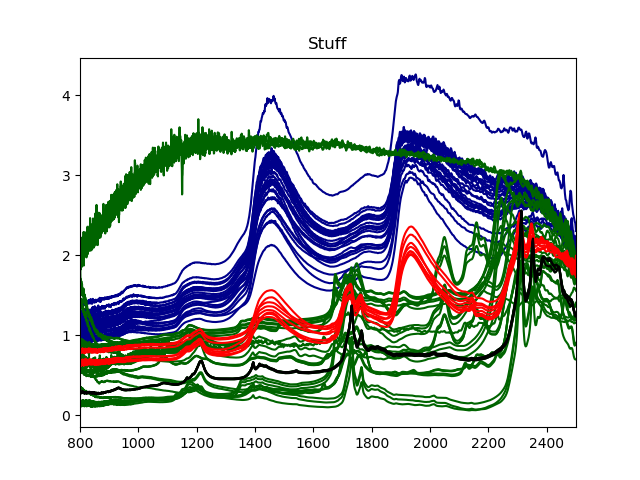

In [43]:
def get_columns(col_type):
    if col_type == "chicken":
        return [col for col in data.columns if (col_type in col) and ("fat" not in col) ]
    elif col_type == "fat":
        return [col for col in data.columns if (col_type in col) and ("plastic" not in col) ]
    elif col_type == "plastic":
        return [col for col in data.columns if (col_type in col) and ("fat" not in col) and ("fillet" not in col) ]
    elif col_type == "marel_liner":
        return [col for col in data.columns if (col_type in col) and ("fat" not in col) and ("fillet" not in col) ]
    else:
        return [col for col in data.columns if col_type in col]
    

ax = data[get_columns("chicken")].plot(color='DarkBlue', label='Chicken', legend=False)
data[get_columns("plastic")].plot(color='DarkGreen', label='Plastic', ax=ax, legend=False)
data[get_columns("fat")].plot(color='Red', label='Fat', ax=ax, legend=False)
data[get_columns("marel_liner")].plot(color='Black', label='Fat', ax=ax, legend=False)
plt.show()


<IPython.core.display.Javascript object>


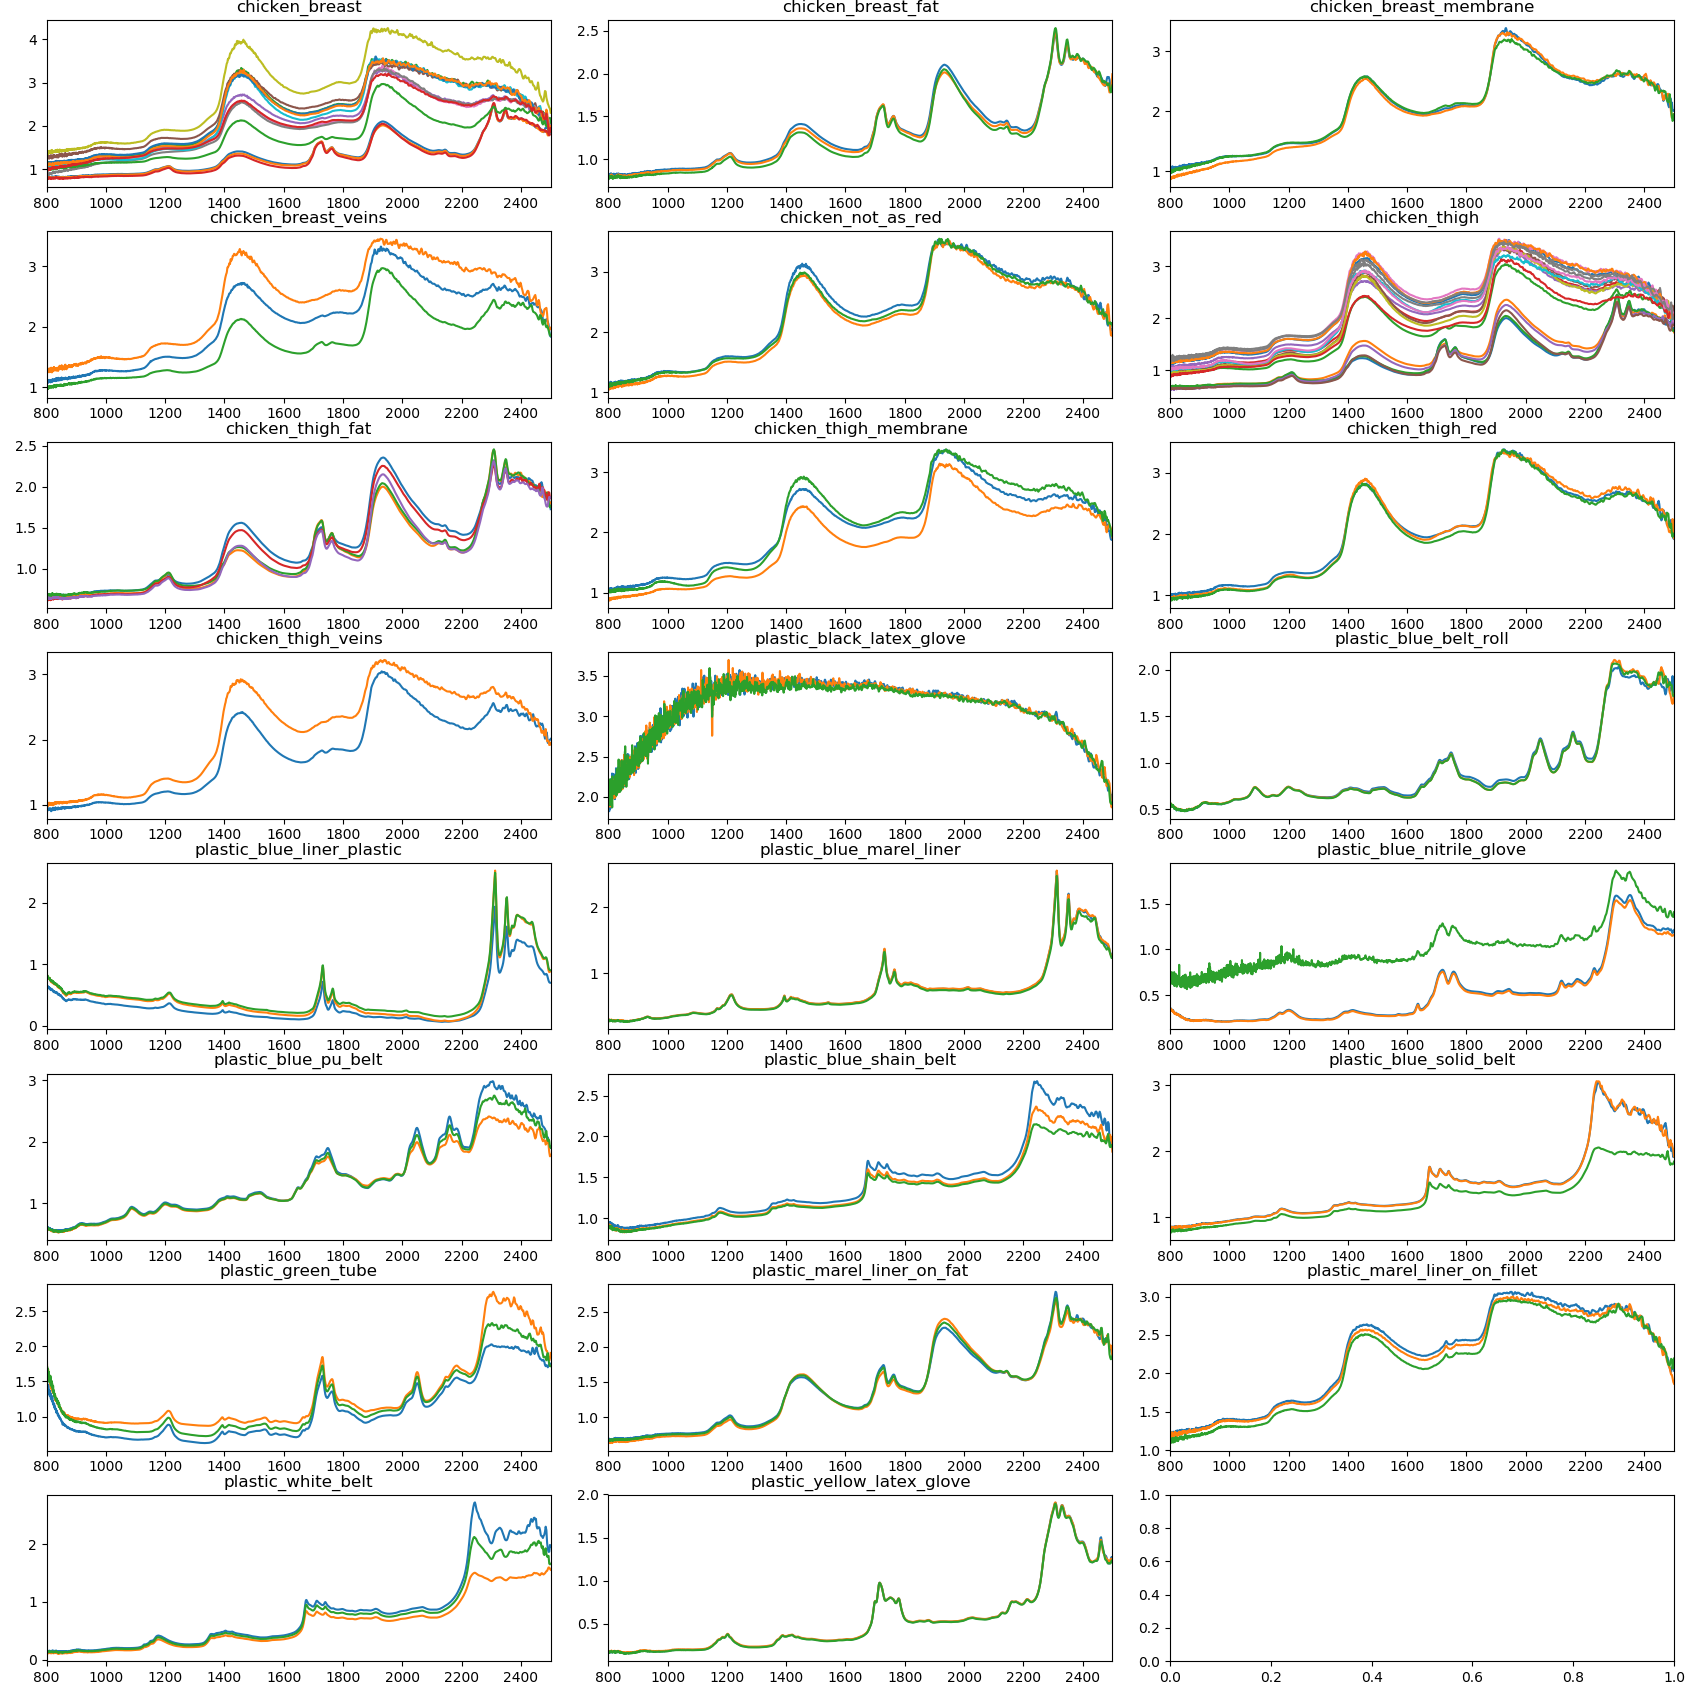

In [4]:
samples = list(set([col[:-2] for col in data.columns]))
samples.sort()

nrows=8
ncols=3

def get_next(count):
    i = count // ncols
    j = count % ncols
    return i, j
    
fig, axes = plt.subplots(figsize=(17, 17), nrows=nrows, ncols=ncols)
fig.tight_layout()

count = 0
for sampl in samples:
    i, j = get_next(count)
    data[get_columns(sampl)].plot(ax=axes[i, j], legend=False)
    axes[i, j].set_title(sampl)
    count += 1

{'Liner_on_Fillet': ['plastic_marel_liner_on_fat_1', 'plastic_marel_liner_on_fat_2', 'plastic_marel_liner_on_fat_3'], 'Liner_on_Fat': ['plastic_marel_liner_on_fillet_1', 'plastic_marel_liner_on_fillet_2', 'plastic_marel_liner_on_fillet_3'], 'Marel_Liner': ['plastic_blue_marel_liner_1', 'plastic_blue_marel_liner_2', 'plastic_blue_marel_liner_3'], 'Plastick_Liner': ['plastic_blue_liner_plastic_1', 'plastic_blue_liner_plastic_2', 'plastic_blue_liner_plastic_3']}


<IPython.core.display.Javascript object>


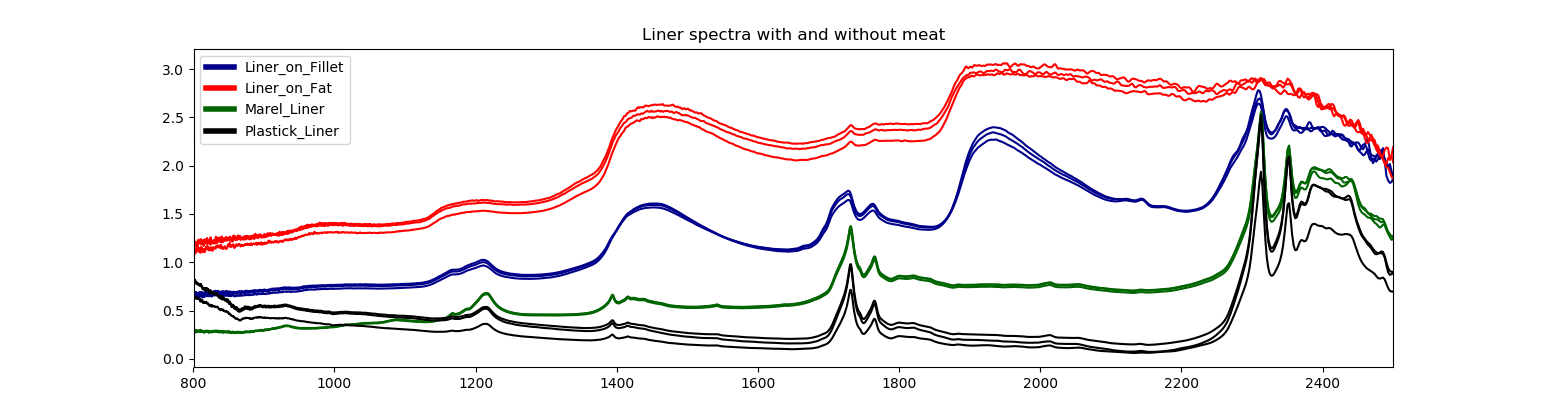

In [62]:
def plot_groups(data, **kwargs):
    colors = ['DarkBlue', 'Red', 'DarkGreen', 'Black', 'Yellow']
    print(kwargs)
    
    ax = None
    i = 0
    lines, labels = [], []
    for key, values in kwargs.items():
        color = colors[i]
        ax = data[values].plot(ax=ax, color=color, legend=False)
        lines.append(Line2D([0], [0], color=color, lw=4))
        labels.append(key)
        i += 1
        
    ax.legend(lines, labels)
    
plot_groups(data, 
            Liner_on_Fillet = ['plastic_marel_liner_on_fat_1', 'plastic_marel_liner_on_fat_2', 'plastic_marel_liner_on_fat_3'],
            Liner_on_Fat    = ['plastic_marel_liner_on_fillet_1', 'plastic_marel_liner_on_fillet_2', 'plastic_marel_liner_on_fillet_3'],
            Marel_Liner     = ['plastic_blue_marel_liner_1', 'plastic_blue_marel_liner_2', 'plastic_blue_marel_liner_3'],
            Plastick_Liner  = ['plastic_blue_liner_plastic_1', 'plastic_blue_liner_plastic_2', 'plastic_blue_liner_plastic_3'])
plt.title("Liner spectra with and without meat");


In [46]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The foll

In [6]:
# Take one spectra -> chicken 
# Add the obsorbtion bands
#   - H20
# Plot the first and second derivative

# TODO: Check this -> https://nirpyresearch.com/two-scatter-correction-techniques-nir-spectroscopy-python/

<IPython.core.display.Javascript object>


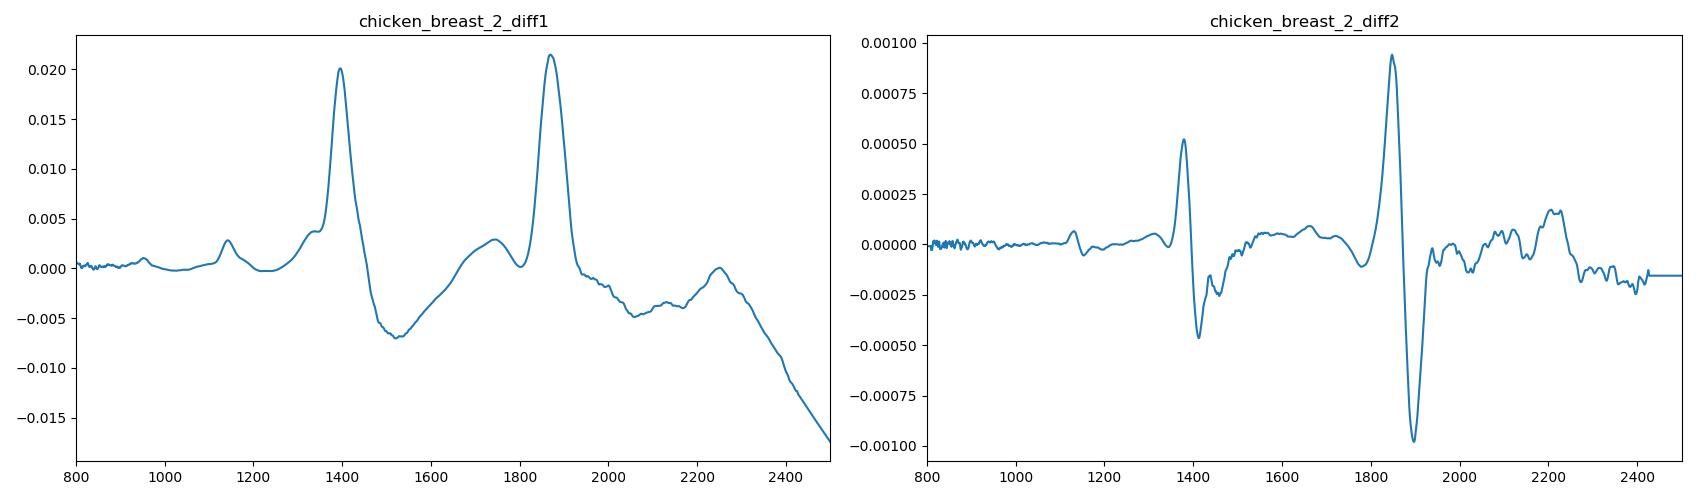

In [13]:
df = data[['chicken_breast_2']].copy()

# Get the first derivative
df['chicken_breast_2_diff1'] = scipy.signal.savgol_filter(df['chicken_breast_2'], window_length=63, polyorder = 2, deriv=1)

# Second derivative
df['chicken_breast_2_diff2'] = scipy.signal.savgol_filter(df['chicken_breast_2'], window_length=63, polyorder = 2, deriv=2)

fig, axes = plt.subplots(figsize=(17, 5), nrows=1, ncols=2)

df['chicken_breast_2_diff1'].plot(ax=axes[0], legend=False)
axes[0].set_title('chicken_breast_2_diff1')
df['chicken_breast_2_diff2'].plot(ax=axes[1], legend=False)
axes[1].set_title('chicken_breast_2_diff2')
fig.tight_layout()

<IPython.core.display.Javascript object>


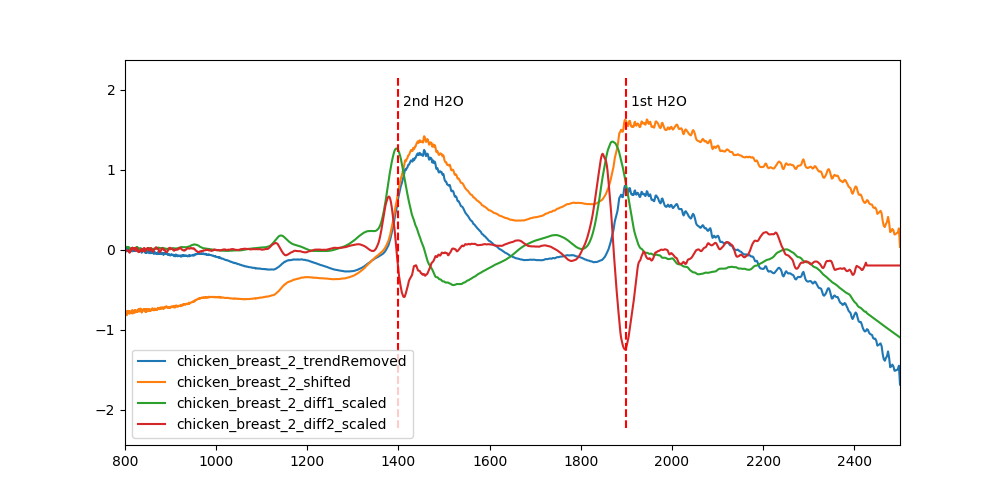

In [15]:
def add_spectral_absorbtion_bands(ax):
    def draw(wavelength, text):
        ax.text(wavelength + 10, ylim[1], text)
        plt.plot((wavelength, wavelength), np.array(ylim)*1.2, 'r--')
        
    ylim = ax.get_ylim()
    
    # 2nd H2O overtone
    wavelength = 1400
    draw(wavelength, '2nd H2O')
    
    # 1st H2O overtone
    wavelength = 1900
    draw(wavelength, '1st H2O')
    
def remove_trend(series):
    # Get the linear best fit
    index = series.index
    reg = LinearRegression().fit(np.array(index).reshape(-1, 1), np.array(series))
    linear_fit = reg.predict(np.array(index).reshape(-1, 1))
    return series - linear_fit
    

max_original, max_diff1, max_diff2 = df[['chicken_breast_2', 'chicken_breast_2', 'chicken_breast_2']].max()

max_original, max_diff1, max_diff2 = df[['chicken_breast_2', 'chicken_breast_2_diff1', 'chicken_breast_2_diff2']].max()
min_original, min_diff1, min_diff2 = df[['chicken_breast_2', 'chicken_breast_2_diff1', 'chicken_breast_2_diff2']].min()


df['chicken_breast_2_trendRemoved'] = remove_trend(df['chicken_breast_2'])
df['chicken_breast_2_shifted'] = df['chicken_breast_2'] - df['chicken_breast_2'].mean()
df['chicken_breast_2_diff1_scaled'] = df['chicken_breast_2_diff1'] * (max_original - min_original) / (max_diff1 - min_diff1)
df['chicken_breast_2_diff2_scaled'] = df['chicken_breast_2_diff2'] * (max_original - min_original) / (max_diff2 - min_diff2)

ax = df[['chicken_breast_2_trendRemoved', 'chicken_breast_2_shifted', 'chicken_breast_2_diff1_scaled', 'chicken_breast_2_diff2_scaled']].plot(figsize=(10, 5))
add_spectral_absorbtion_bands(ax)

<IPython.core.display.Javascript object>


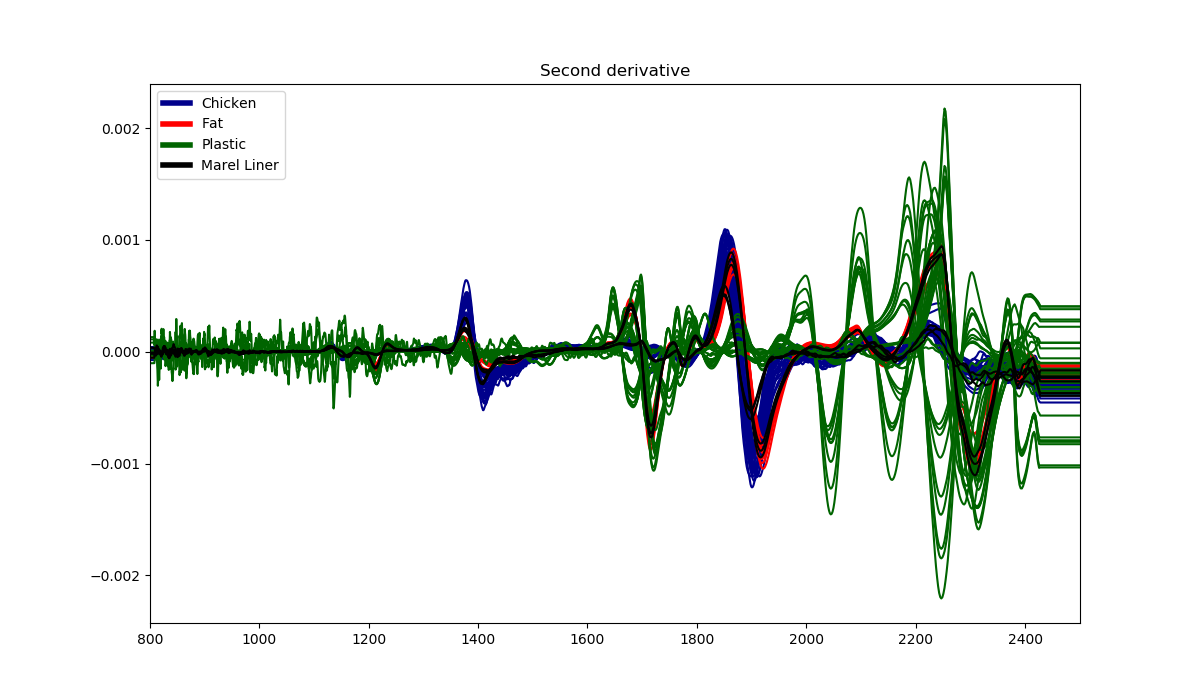

In [39]:
def second_derivative(series):
    series = series.copy()
    series.iloc[:] = scipy.signal.savgol_filter(series, window_length=63, polyorder = 2, deriv=2)
    return series
    

data_diff = data.apply(second_diff, axis=0)

ax = data_diff[get_columns("chicken")].plot(figsize=(12, 7), color='DarkBlue', label='Chicken', legend=False)
data_diff[get_columns("fat")].plot(color='Red', label='Fat', ax=ax, legend=False)
data_diff[get_columns("plastic")].plot(color='DarkGreen', label='Plastic', ax=ax, legend=False)
data_diff[get_columns("plastic_marel_liner")].plot(color='Black', label='Marel Liner', ax=ax, legend=False)
plt.show()
plt.title("Second derivative")

ax.legend([Line2D([0], [0], color='DarkBlue', lw=4),
           Line2D([0], [0], color='Red', lw=4),
           Line2D([0], [0], color='DarkGreen', lw=4),
           Line2D([0], [0], color='Black', lw=4)], ['Chicken', 'Fat', 'Plastic', 'Marel Liner'])

In [10]:
# Setup the problem with Y as meat, fat and plastic and then X as the corresponding spectra reflectance
# Run a PLS fit on the data
# -> https://nirpyresearch.com/partial-least-squares-regression-python/
# And the do the same after preselecting the wavelength bands from the spectra to figure out "the most important spectra bands"